# Loan Default Prediction - Part 14 - Neural Networks

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 14 of the project: Neural Networks.

In this part, I will use the most simple neural network, a single perceptron, to establish the experiment flow, and experiment on the various optimizers.

I will first load the data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils
import project_keras_utils as keras_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the training data (imputed but not normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f1_0 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


## Single-Layer Perceptron

I use the [Keras](https://keras.io/) library to build the neural networks. I will first build the simplest neural network: a single perceptron.

In [3]:
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation

In [4]:
# Define parameters

n_features = X.shape[1]
n_epochs = 10
batch_size = 256
class_weight = {0: 1., 1: 10.}

In [5]:
# Build Keras model

inputs = Input(shape=(n_features,), name='input')
class_output = Dense(1, activation='sigmoid', name='class_output')(inputs)
clf = Model(inputs=inputs, outputs=class_output)

clf.compile(loss='binary_crossentropy',
            #optimizer=keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False),
            optimizer=keras.optimizers.SGD(lr=0.001),
            metrics=['binary_accuracy'])

In [6]:
# Plot the model

from keras.utils import plot_model
plot_model(clf, to_file='model.png')

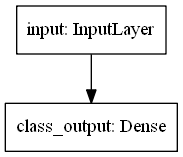

In [7]:
from IPython.display import Image
Image("model.png")

Epoch 1/10
84376/84376 [==============================] - 9s 107us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 2/10
84376/84376 [==============================] - 9s 106us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 3/10
84376/84376 [==============================] - 9s 106us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 4/10
84376/84376 [==============================] - 9s 108us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 5/10
84376/84376 [==============================] - 9s 106us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 6/10
84376/84376 [==============================] - 9s 104us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 7/10
84376/84376 [==============================] - 9s 104us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 8/10
84376/84376 [==============================] - 9s 104us/step - loss: 14.3124 - binary_accuracy: 0.1022
Epoch 9/10
84376/84376 [==============================] - 9s 107us/step - loss: 14.3124 

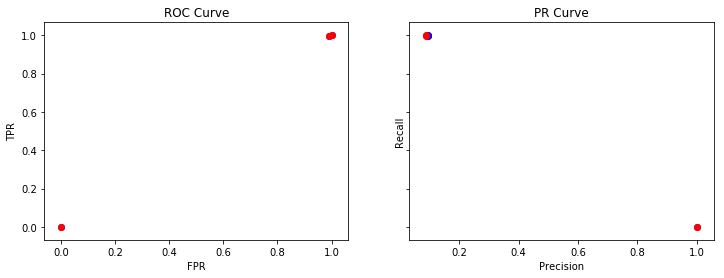

In [8]:
# Train and evaluate the model

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, None)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/10
84376/84376 [==============================] - 9s 107us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 2/10
84376/84376 [==============================] - 9s 107us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 3/10
84376/84376 [==============================] - 9s 106us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 4/10
84376/84376 [==============================] - 9s 106us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 5/10
84376/84376 [==============================] - 9s 107us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 6/10
84376/84376 [==============================] - 9s 105us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 7/10
84376/84376 [==============================] - 9s 104us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 8/10
84376/84376 [==============================] - 9s 105us/step - loss: 14.3795 - binary_accuracy: 0.1022
Epoch 9/10
84376/84376 [==============================] - 9s 103us/step - loss: 14.3795 

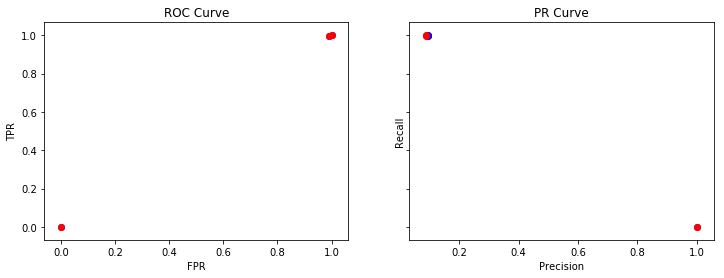

In [9]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

The results are not good at all, whether adding the class weights or not. It looks like the optimization converged very quickly at a local optimal.

## Normalized Data

Next, I'll try using the normalized data and repeat the experiments.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB
Epoch 1/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.6085 - binary_accuracy: 0.6984
Epoch 2/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.4359 - binary_accuracy: 0.8825
Epoch 3/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.3711 - binary_accuracy: 0.9024
Epoch 4/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.3408 - binary_accuracy: 0.9048
Epoch 5/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.3249 - binary_accuracy: 0.9056
Epoch 6/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.3156 - binary_accuracy: 0.9059
Epoch 7/30
84376/84376 [==============================] - 9s 103us/step - loss: 0.3099 - binary_accuracy: 0.9060
Epoch 8/30
84376/84376 [==============================

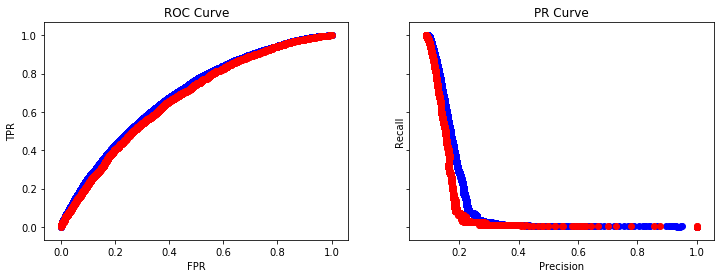

In [10]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

# Train the model and evaluate
n_epochs = 30
fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, None)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.6232 - binary_accuracy: 0.8445
Epoch 2/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.2922 - binary_accuracy: 0.7752
Epoch 3/30
84376/84376 [==============================] - 9s 106us/step - loss: 1.1952 - binary_accuracy: 0.7066
Epoch 4/30
84376/84376 [==============================] - 9s 106us/step - loss: 1.1679 - binary_accuracy: 0.6587
Epoch 5/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1593 - binary_accuracy: 0.6334
Epoch 6/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1554 - binary_accuracy: 0.6183
Epoch 7/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1530 - binary_accuracy: 0.6140
Epoch 8/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1509 - binary_accuracy: 0.6114
Epoch 9/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1490 - binary_

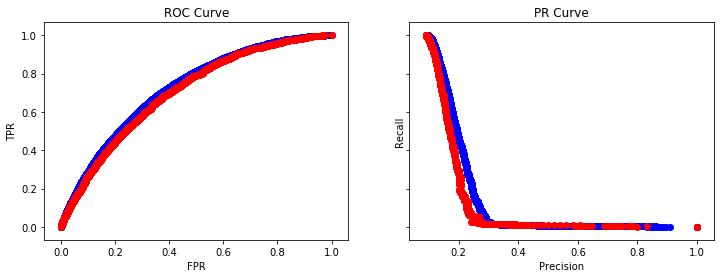

In [11]:
# Train and evaluate the model with class weights

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Now the models look much better. I am able to get an ROCAUC of 0.678 with normalized data and 0.707 with added class weights. The results are comparable with those in Part 3: Logistic Regression with Regularization and Feature Expansion. This is another implementatino of Logistic Regression, after all.

## Optimizers

Keras provides a few different optimizers other than SGD (stochastic gradient descent). I will try them and observe the convergence and performance of the models, using the same learning rate __lr__.

Epoch 1/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1524 - binary_accuracy: 0.6241
Epoch 2/30
84376/84376 [==============================] - 9s 107us/step - loss: 1.1459 - binary_accuracy: 0.6307
Epoch 3/30
84376/84376 [==============================] - 9s 107us/step - loss: 1.1466 - binary_accuracy: 0.6326
Epoch 4/30
84376/84376 [==============================] - 9s 107us/step - loss: 1.1446 - binary_accuracy: 0.6354
Epoch 5/30
84376/84376 [==============================] - 9s 107us/step - loss: 1.1456 - binary_accuracy: 0.6343
Epoch 6/30
84376/84376 [==============================] - 9s 107us/step - loss: 1.1440 - binary_accuracy: 0.6349
Epoch 7/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1457 - binary_accuracy: 0.6384
Epoch 8/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1456 - binary_accuracy: 0.6373
Epoch 9/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1476 - binary_

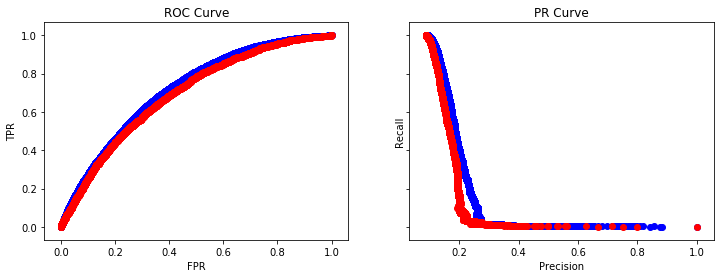

In [12]:
# RMSprop

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.RMSprop(lr=0.001),
            metrics=['binary_accuracy'])

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1609 - binary_accuracy: 0.6398
Epoch 2/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1562 - binary_accuracy: 0.6378
Epoch 3/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1550 - binary_accuracy: 0.6398
Epoch 4/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1542 - binary_accuracy: 0.6398
Epoch 5/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1536 - binary_accuracy: 0.6398
Epoch 6/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1531 - binary_accuracy: 0.6396
Epoch 7/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1526 - binary_accuracy: 0.6389
Epoch 8/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1523 - binary_accuracy: 0.6393
Epoch 9/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1519 - binary_

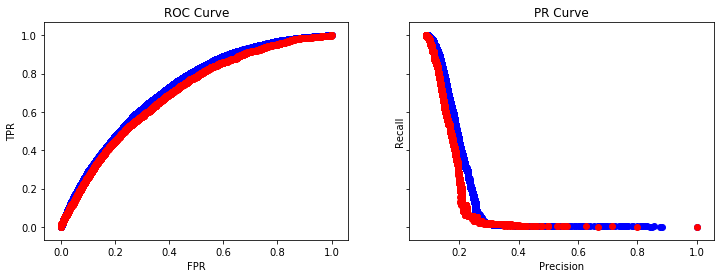

In [13]:
# Adagrad

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adagrad(lr=0.001),
            metrics=['binary_accuracy'])

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/30
84376/84376 [==============================] - 9s 111us/step - loss: 1.1480 - binary_accuracy: 0.6401
Epoch 2/30
84376/84376 [==============================] - 9s 110us/step - loss: 1.1480 - binary_accuracy: 0.6401
Epoch 3/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6401
Epoch 4/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6403
Epoch 5/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6403
Epoch 6/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6403
Epoch 7/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6403
Epoch 8/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_accuracy: 0.6405
Epoch 9/30
84376/84376 [==============================] - 9s 109us/step - loss: 1.1480 - binary_

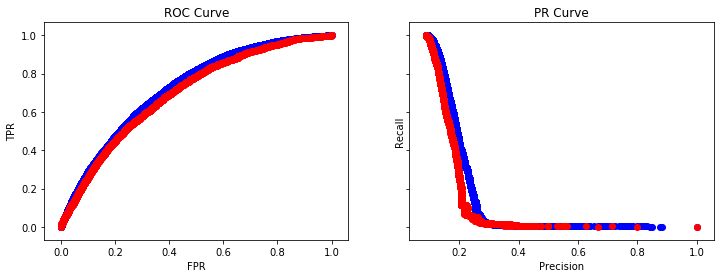

In [14]:
# Adadelta

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adadelta(lr=0.001),
            metrics=['binary_accuracy'])

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/30
84376/84376 [==============================] - 9s 105us/step - loss: 1.1705 - binary_accuracy: 0.6357
Epoch 2/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1633 - binary_accuracy: 0.6371
Epoch 3/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1574 - binary_accuracy: 0.6355
Epoch 4/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1524 - binary_accuracy: 0.6359
Epoch 5/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1500 - binary_accuracy: 0.6374
Epoch 6/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1445 - binary_accuracy: 0.6404
Epoch 7/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1411 - binary_accuracy: 0.6359
Epoch 8/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1408 - binary_accuracy: 0.6405
Epoch 9/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1400 - binary_

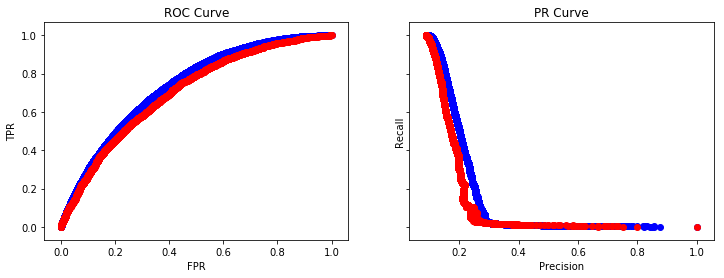

In [15]:
# Adam

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adam(lr=0.001),
            metrics=['binary_accuracy'])

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Epoch 1/30
84376/84376 [==============================] - 9s 106us/step - loss: 1.1103 - binary_accuracy: 0.6516
Epoch 2/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1075 - binary_accuracy: 0.6511
Epoch 3/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1071 - binary_accuracy: 0.6456
Epoch 4/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1074 - binary_accuracy: 0.6499
Epoch 5/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1082 - binary_accuracy: 0.6482
Epoch 6/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1080 - binary_accuracy: 0.6501
Epoch 7/30
84376/84376 [==============================] - 9s 104us/step - loss: 1.1063 - binary_accuracy: 0.6473
Epoch 8/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1072 - binary_accuracy: 0.6495
Epoch 9/30
84376/84376 [==============================] - 9s 103us/step - loss: 1.1071 - binary_

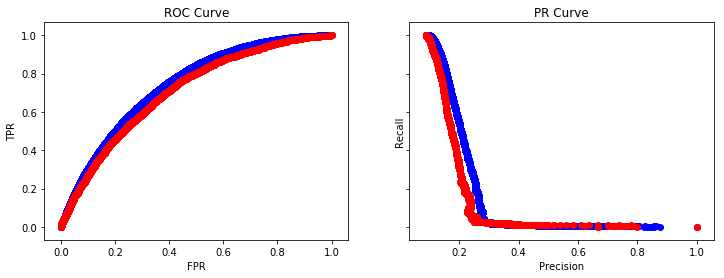

In [16]:
# Adamax

clf.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adamax(lr=0.001),
            metrics=['binary_accuracy'])

fit_time = keras_utils.train_model(clf, X_train, y_train, n_epochs, batch_size, class_weight)
acc_score, rocauc_score, prauc_score, eval_time = keras_utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

All of the optimizers do pretty well, with the Adam and Adamax (a variantn of Adam) being the best at ROCAUC = 0.704 and 0.709, respectively.